In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

**Data Preprocessing**

In [ ]:
train = '/content/drive/MyDrive/Capstone Project/ML Colab/Dataset/Fix/train'
test = '/content/drive/MyDrive/Capstone Project/ML Colab/Dataset/Fix/test'
validation = '/content/drive/MyDrive/Capstone Project/ML Colab/Dataset/Fix/val'

SIZE = 224
batch_size = 32

In [ ]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    vertical_flip = True,
    rotation_range = 45, 
    zoom_range = 0.2,
    shear_range = 0.2,
    height_shift_range = 0.2,
    width_shift_range = 0.2,
    fill_mode = 'nearest'
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255
)

test_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train,
    target_size = (SIZE, SIZE),
    batch_size = batch_size,
    class_mode = 'categorical',
    color_mode = 'rgb',
    shuffle = True,
    seed = 42
)

validation_generator = train_datagen.flow_from_directory(
    validation,
    target_size = (SIZE, SIZE),
    batch_size = batch_size,
    class_mode = 'categorical',
    color_mode = 'rgb',
    shuffle = True,
    seed = 42
)

test_generator = train_datagen.flow_from_directory(
    test,
    target_size = (SIZE, SIZE),
    batch_size = batch_size,
    class_mode = 'categorical',
    color_mode = 'rgb',
    shuffle = True,
    seed = 42
)

Found 704 images belonging to 8 classes.
Found 88 images belonging to 8 classes.
Found 88 images belonging to 8 classes.


**Training Model**

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu', input_shape = (SIZE, SIZE, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(8, activation = 'softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 256)    0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 111, 111, 256)     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 54, 54, 128)       0

In [ ]:
model.compile(optimizer = 'Adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    validation_data = validation_generator,
    epochs = 60,
    verbose = 2
)

Epoch 1/60
22/22 - 374s - loss: 2.2193 - accuracy: 0.1619 - val_loss: 1.9898 - val_accuracy: 0.3523 - 374s/epoch - 17s/step
Epoch 2/60
22/22 - 22s - loss: 1.7510 - accuracy: 0.3665 - val_loss: 1.4740 - val_accuracy: 0.5000 - 22s/epoch - 1s/step
Epoch 3/60
22/22 - 23s - loss: 1.5192 - accuracy: 0.4403 - val_loss: 1.4835 - val_accuracy: 0.4318 - 23s/epoch - 1s/step
Epoch 4/60
22/22 - 23s - loss: 1.3860 - accuracy: 0.4773 - val_loss: 1.2471 - val_accuracy: 0.5455 - 23s/epoch - 1s/step
Epoch 5/60
22/22 - 23s - loss: 1.2436 - accuracy: 0.5440 - val_loss: 1.1593 - val_accuracy: 0.5455 - 23s/epoch - 1s/step
Epoch 6/60
22/22 - 23s - loss: 1.2365 - accuracy: 0.5426 - val_loss: 1.1321 - val_accuracy: 0.6023 - 23s/epoch - 1s/step
Epoch 7/60
22/22 - 23s - loss: 1.2432 - accuracy: 0.5327 - val_loss: 1.1989 - val_accuracy: 0.6023 - 23s/epoch - 1s/step
Epoch 8/60
22/22 - 25s - loss: 1.1870 - accuracy: 0.5767 - val_loss: 1.1144 - val_accuracy: 0.6136 - 25s/epoch - 1s/step
Epoch 9/60
22/22 - 22s - loss

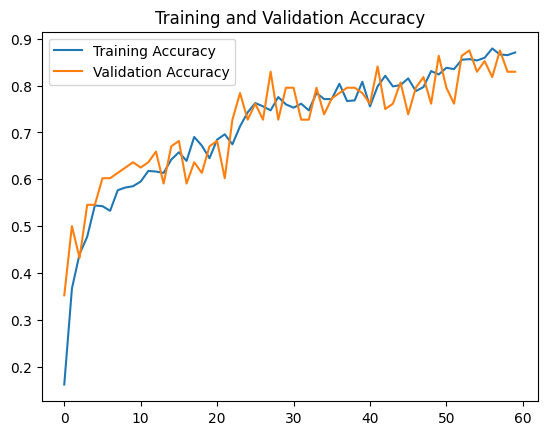

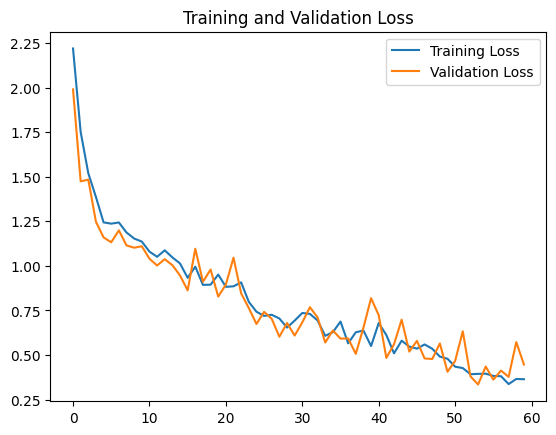

<Figure size 640x480 with 0 Axes>

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

# Training and Validation Accuracy
plt.plot(epochs, accuracy, label = 'Training Accuracy')
plt.plot(epochs, val_accuracy, label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc = 0)
plt.figure()

# Training and Validation Loss
plt.plot(epochs, loss, label = 'Training Loss')
plt.plot(epochs, val_loss, label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc = 0)
plt.figure()

plt.show()

In [ ]:
model.evaluate(test_generator, verbose = 2)

3/3 - 28s - loss: 0.4223 - accuracy: 0.8409 - 28s/epoch - 9s/step


[0.42228031158447266, 0.8409090638160706]

**Predict Image**

Saving humus.jpg to humus.jpg
1/1 [==============================] - 0s 401ms/step


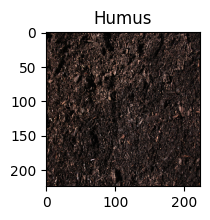

In [ ]:
import numpy as np

from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

class_index = {v : k for k, v in train_generator.class_indices.items()}

uploaded = files.upload()

figure = plt.figure(figsize = (2, 2*len(uploaded)))

for i, image_test in enumerate(uploaded):
  img = load_img(image_test, target_size = (SIZE, SIZE))
  x = img_to_array(img)/255
  x = np.expand_dims(x, axis = 0)

  classes = model.predict(x, batch_size = batch_size)
  predicted_class = np.argmax(classes)
  predict = class_index[predicted_class]
  
  sub_x = figure.add_subplot(len(uploaded), 1, i+1)
  sub_x.imshow(img)
  sub_x.set_title(predict)

**Export Model**

In [ ]:
export_dir = '/content/drive/MyDrive/Capstone Project/ML Colab/Dataset/Fix/saved_model_0'
tf.saved_model.save(model, export_dir)

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [ ]:
import pathlib

tflite_model_file = pathlib.Path('/content/drive/MyDrive/Capstone Project/ML Colab/Dataset/Fix/saved_model_0/soil_model.tflite')
tflite_model_file.write_bytes(tflite_model)

23663884